In [ ]:
import os
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import adjustText
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
df = pd.read_csv("mcdonalds.csv")

In [ ]:
df = df.replace({"Yes":1, "No":0})

In [ ]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [ ]:
df_attr = df.iloc[:, :11]

In [ ]:
df_attr.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0


In [ ]:
p = PCA()
df_decomposed = p.fit_transform(df_attr)
df_decomposed = pd.DataFrame(df_decomposed, columns = df_attr.columns)

In [ ]:
df_decomposed

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [ ]:
a = df_decomposed.describe().loc["std"].to_frame()
std_dev = a["std"]
a["Proportion of Variance"] =  [(std_dev ** 2) / np.sum(np.square(std_dev)) for std_dev in std_dev]
a["Cummulative Proportion"] = np.cumsum(a["Proportion of Variance"])
a.rename(columns = {"std":"Standard Deviations"}, inplace = True)
a

,Standard Deviations,Proportion of Variance,Cummulative Proportion
yummy,0.757050,1.0,1.0
convenient,0.607456,1.0,2.0
spicy,0.504619,1.0,3.0
fattening,0.398799,1.0,4.0
greasy,0.337405,1.0,5.0
fast,0.310275,1.0,6.0
cheap,0.289697,1.0,7.0
tasty,0.275122,1.0,8.0
expensive,0.265251,1.0,9.0
healthy,0.248842,1.0,10.0


In [ ]:
df_transposed = df_decomposed.head(11).T
df_transposed.columns = [("PC" + str(i)) for i in range(1,12)]
df_transposed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.425367,-0.218638,0.375415,-0.172926,0.187057,-0.852122,-0.405961,-0.547679,1.705573,0.118548,0.471078
convenient,-0.219079,0.388190,0.730435,-0.352752,-0.807610,-0.149257,1.158064,-0.213096,0.258617,0.998823,-0.960021
spicy,0.663255,-0.730827,-0.122040,-0.843795,0.028537,0.047150,0.375889,-0.755223,0.048778,-0.581516,0.550287
fattening,-0.401300,-0.094724,0.692262,0.206998,0.548332,-0.416501,0.493465,-0.162540,0.343028,-0.213683,-0.099577
greasy,0.201705,0.044669,0.839643,-0.681415,0.854074,-0.313605,0.170709,0.047794,-0.422671,0.173642,-0.524379
fast,-0.389767,-0.086596,-0.687406,-0.036133,-0.097305,-0.034602,-0.726015,0.174745,0.654405,0.016644,-0.339304
cheap,-0.211982,-0.095877,0.583112,-0.054284,-0.457043,-0.063662,0.266424,-0.027493,-0.015571,-0.055428,-0.170389
tasty,0.163235,-0.034756,0.364379,-0.231477,0.171758,0.073945,0.515661,-0.064296,0.458631,-0.174817,-0.033485
expensive,0.181007,0.111476,-0.322288,-0.028003,-0.074409,0.047327,0.252962,0.044480,-0.118123,0.035407,0.041528
healthy,0.515706,0.493313,0.061759,-0.250678,0.031897,0.030206,-0.057233,0.038914,0.233020,0.065225,-0.228285


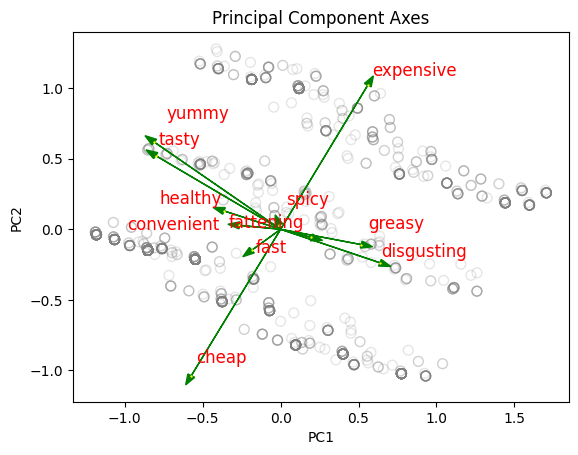

In [ ]:
scale = 1.7
plt.scatter(x=df_decomposed['yummy'], y=df_decomposed['convenient'], edgecolor='Grey', linewidths=1, facecolor='none', alpha=0.2, s=50)

texts = []
for i, col_name in enumerate(df_decomposed.columns):
    text = plt.text(
        p.components_[0, i] * scale,
        p.components_[1, i] * scale,
        col_name,
        color='red',
        fontsize=12,
        ha='center',
        va='bottom',
        stretch="expanded"
    )
    texts.append(text)
    plt.arrow(0, 0, p.components_[0, i] * scale, p.components_[1, i] * scale, color='green', head_width=0.05)
    adjust_text(texts)

plt.scatter(p.components_[0, :] * scale, p.components_[1, :] * scale, s=0.5, color='yellow')

plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()


In [ ]:
np.random.seed(1234)

In [ ]:
k_range = range(2, 9)
inertias = []
silhouette_scores = []
k_result = []

for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = model.fit_predict(df_attr)
    inertia = model.inertia_
    silhouette = silhouette_score(df_attr, labels)

    inertias.append(inertia)
    silhouette_scores.append(silhouette)
    k_result.append(labels)

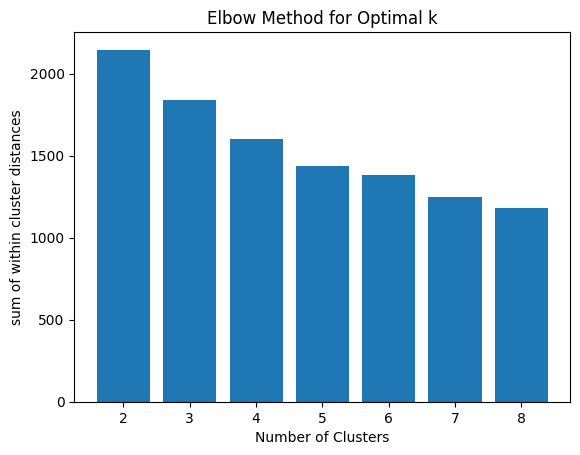

In [ ]:
plt.bar(k_range, inertias)
plt.grid(False)
plt.xlabel('Number of Clusters')
plt.ylabel('sum of within cluster distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()

In [ ]:
boot_n = 200
ARI_scores = []

for label in k_result:
    bootstrap_samples = [np.random.choice(label, size=len(label), replace=True) for _ in range(boot_n)]
    ari_boot = [adjusted_rand_score(label, bootstrap_sample) + 0.01 for bootstrap_sample in bootstrap_samples]
    ARI_scores.append(ari_boot)

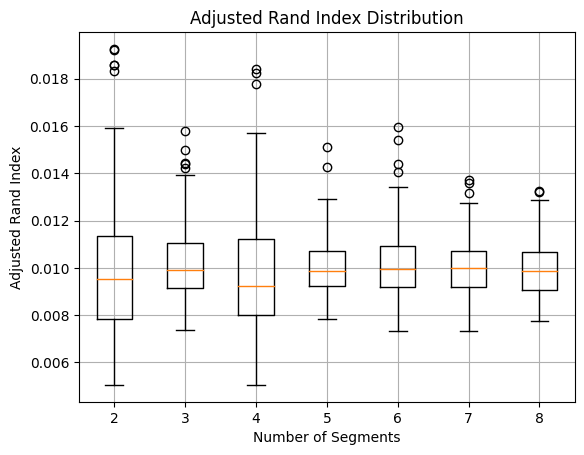

In [ ]:
plt.boxplot(ARI_scores, labels=range(2, 9))
plt.title('Adjusted Rand Index Distribution')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.show()


In [ ]:
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df_attr)
labels = model.predict(df_attr)

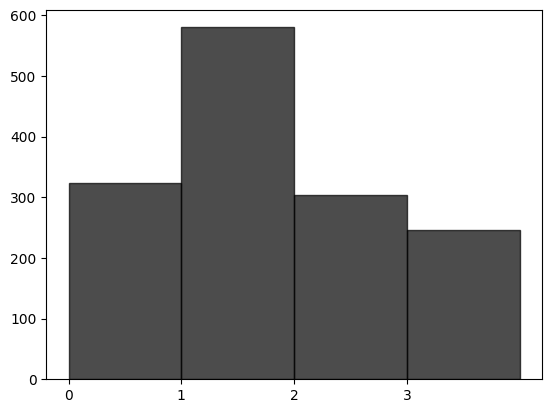

In [ ]:
plt.hist(labels, bins=range(5), color='black', edgecolor='black', alpha=0.7)
plt.xticks(range(4))
plt.grid(False)
plt.show()

            AIC           BIC
2 -14834.648124 -14016.033346
3 -31728.350134 -30497.787275
4 -38915.066521 -37272.555579
5 -50274.623178 -48220.164155
6 -49422.845787 -46956.438682
7 -55868.524608 -52990.169421
8 -54818.919033 -51528.615764


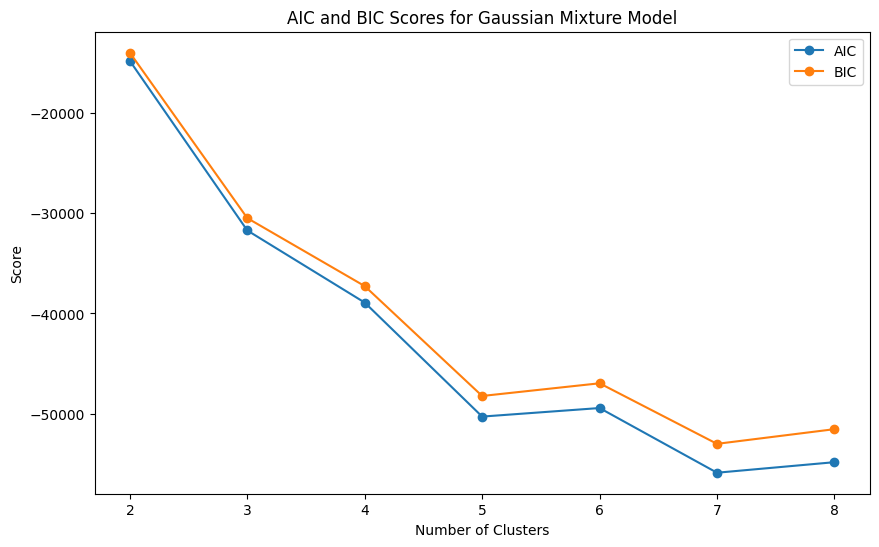

In [ ]:
data = df_attr
scores = {'AIC': [], 'BIC': []}
models = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10).fit(data)
    models.append(model)
    scores['AIC'].append(model.aic(data))
    scores['BIC'].append(model.bic(data))

results_df = pd.DataFrame(scores, index=range(2, 9))
print(results_df)

plt.figure(figsize=(10, 6))
for score_name in scores:
    plt.plot(range(2, 9), scores[score_name], marker='o', label=score_name)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()


<Axes: >

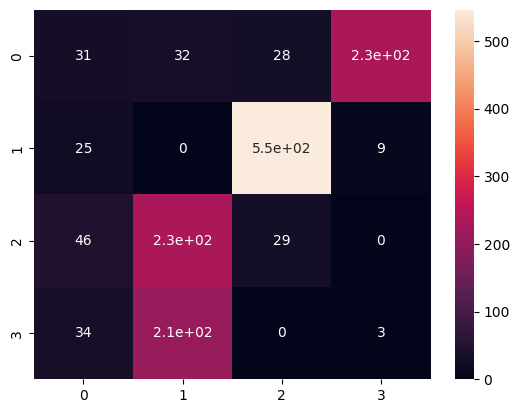

In [ ]:
gmm = GaussianMixture(n_components=4, n_init=10, random_state=0).fit(df_attr)
cluster_assignments_gmm = gmm.predict(df_attr)

# KMeans Model
model = KMeans(n_clusters=4, n_init=10, random_state=0).fit(df_attr)
labels = model.labels_

# Confusion Matrix
conf_matrix = confusion_matrix(labels, cluster_assignments_gmm)

sns.heatmap(data=conf_matrix, annot = True)


<ipython-input-146-d0a9c6bc2b75>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='ward')


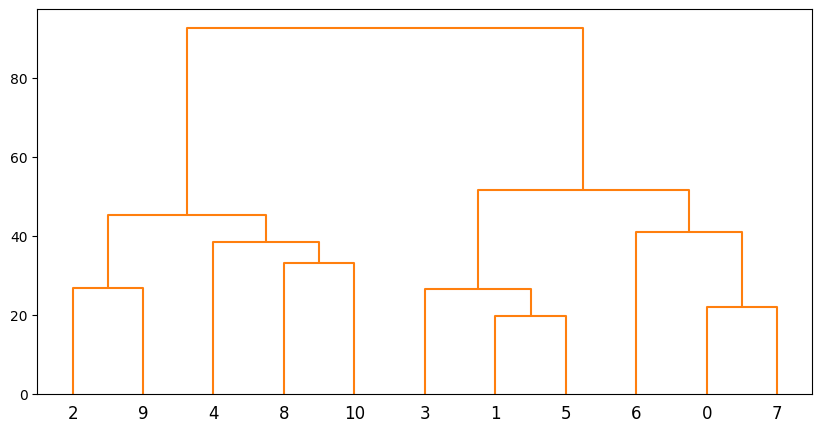

In [ ]:
distances = pairwise_distances(df_attr.T, metric='euclidean')
linkage_matrix = linkage(distances, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, color_threshold=100)
plt.show()

In [ ]:
df_cluster = df_attr.copy()
df_cluster["cluster"]= labels
df_cluster["cluster"].value_counts()

1    580
0    323
2    304
3    246
Name: cluster, dtype: int64

In [ ]:
data = {
    'Attribute': df_attr.columns,
    **{f'Cluster{i}': (df_cluster[df_cluster.cluster == i].drop(columns="cluster").sum() / value).values
       for i, value in enumerate(df_cluster["cluster"].value_counts().sort_index())}
}
cluster_data = pd.DataFrame(data)

In [ ]:
cluster_data

,Attribute,Cluster0,Cluster1,Cluster2,Cluster3
0,yummy,0.854489,0.887931,0.023026,0.020325
1,convenient,0.962848,0.981034,0.891447,0.682927
2,spicy,0.133127,0.086207,0.072368,0.085366
3,fattening,0.907121,0.794828,0.924342,0.914634
4,greasy,0.619195,0.329310,0.667763,0.695122
5,fast,0.860681,0.960345,0.963816,0.731707
6,cheap,0.108359,0.922414,0.934211,0.065041
7,tasty,0.931889,0.975862,0.154605,0.089431
8,expensive,0.897833,0.017241,0.013158,0.878049
9,healthy,0.204334,0.320690,0.072368,0.060976


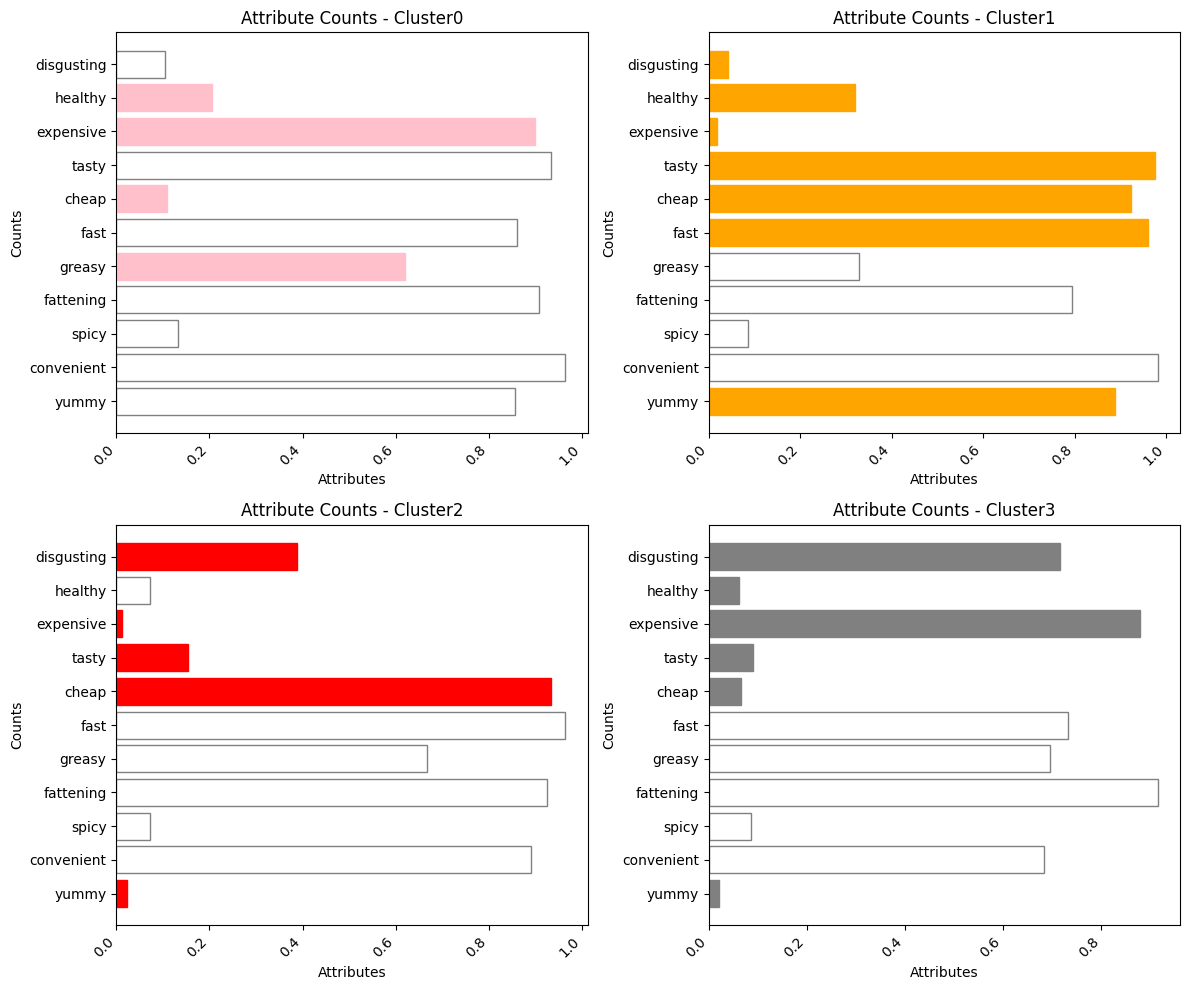

In [ ]:
df_data= pd.DataFrame(data)

clusters = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3']

plt.figure(figsize=(12, 10))
for idx, cluster in enumerate(clusters, 1):
    if idx==1:
        highlighted_attributes = [6, 4, 8,9]
        color="pink"
    elif idx==2:
        highlighted_attributes = [0,5,6,7,8,9,10]
        color="orange"
    elif idx==3:
        highlighted_attributes = [0,6,7,8,10]
        color="red"
    else:
        highlighted_attributes = [0, 6,7,8,9,10]
        color="grey"
    plt.subplot(2, 2, idx)
    bars = plt.barh(df_data['Attribute'], df_data[cluster],edgecolor='Grey', facecolor='none',)
    for i in highlighted_attributes:
        bars[i].set_color(color)
    plt.grid(False)
    plt.xlabel('Attributes')
    plt.ylabel('Counts')
    plt.title(f'Attribute Counts - {cluster}')
    plt.xticks(rotation=45, ha='right')


plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


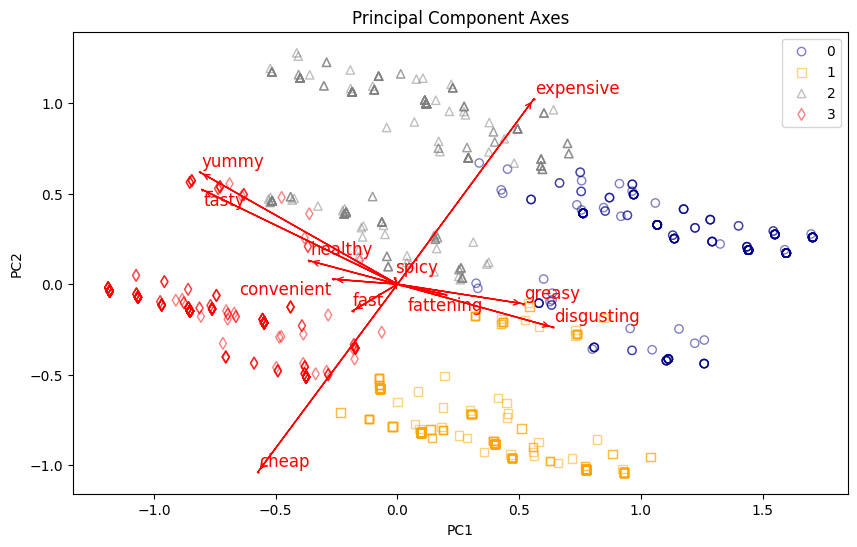

In [ ]:
k_4 = KMeans(n_clusters=4, random_state=0)
k_4.fit(df_decomposed)
l_4 = k_4.labels_

plt.figure(figsize=(10, 6))

markers = ['o', 's', '^', 'd']
edge_colors = ['darkblue', 'orange', 'grey', 'red']

for i in range(4):
    temp = df_decomposed[l_4 == i]
    plt.scatter(
        temp['yummy'],
        temp['convenient'],
        label=i,
        edgecolor=edge_colors[i],
        marker=markers[i],
        facecolor='none',
        alpha=0.5
    )

scale = 1.7

texts = []
for i, j in enumerate(df_decomposed.columns):
    text = plt.text(
        p.components_[0, i] * scale,
        p.components_[1, i] * scale,
        j,
        color='red',
        fontsize=12,
        ha='center',
        va='bottom',
        stretch="expanded"
    )
    texts.append(text)
    plt.arrow(0, 0, p.components_[0, i] * scale, p.components_[1, i] * scale, color='red')
    plt.annotate(
        '', xytext=(0, 0),
        xy=(p.components_[0, i] * scale, p.components_[1, i] * scale),
        arrowprops=dict(
            arrowstyle="->",
            color='red'
        )
    )
adjust_text(texts)

plt.scatter(
    p.components_[0, :] * scale,
    p.components_[1, :] * scale,
    s=0.5,
    color='red'
)

plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.legend()
plt.show()

In [ ]:
l = df['Like'].replace({
    f'I love it!+{i}': i for i in range(5, 0, -1)
    }).replace({
    f'I hate it!-{i}': -i for i in range(5, 0, -1)
    }).astype(int)

In [ ]:
l

0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like, Length: 1453, dtype: int64

<Figure size 1000x600 with 0 Axes>

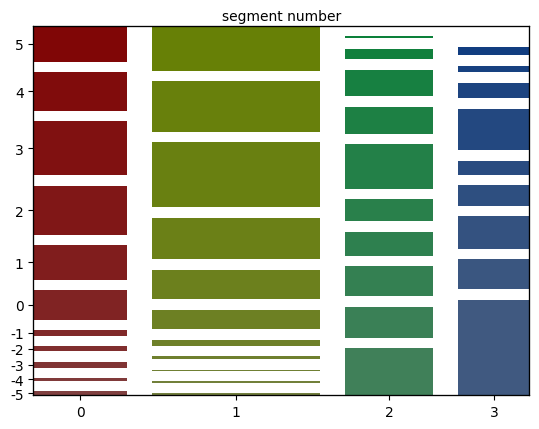

In [ ]:
data = {
    'segment': labels,
    'lovehate': l
}
ds = pd.DataFrame(data)
crosstab = pd.crosstab(ds['segment'], ds['lovehate'])
plt.figure(figsize=(10, 6))
mosaic_data = crosstab.stack()
mosaic(mosaic_data, title='', axes_label=True, gap=0.06, labelizer=lambda k: '')
plt.grid(False)
plt.title('')
plt.xlabel('segment number')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

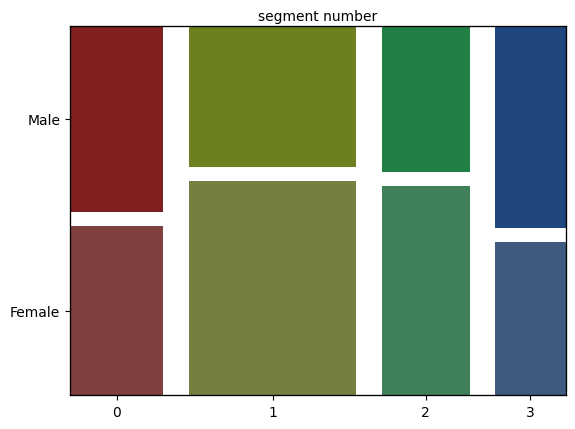

In [ ]:
data = {
    'segment': labels,
    'lovehate': df.Gender
}
ds = pd.DataFrame(data)
crosstab = pd.crosstab(ds['segment'], ds['lovehate'])
plt.figure(figsize=(10, 6))
mosaic_data = crosstab.stack()
mosaic(mosaic_data, title='', axes_label=True, gap=0.06, labelizer=lambda k: '')
plt.title('')
plt.xlabel('segment number')
plt.ylabel('Count')
plt.grid(False)
plt.show()

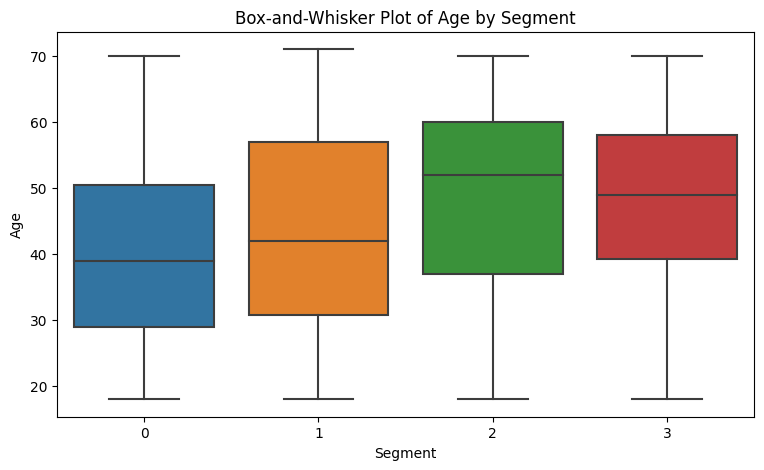

In [ ]:
data = {
    'segment': labels,
    'Age': df.Age
}
ds = pd.DataFrame(data)

plt.figure(figsize=(9, 5))
sns.boxplot(x='segment', y='Age', data=ds)
plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('Box-and-Whisker Plot of Age by Segment')

plt.show()

In [ ]:
data = {
    'segment': labels,
    'lovehate': l,
    'Age': df.Age,
    'VisitFrequency': df.VisitFrequency,
    'Gender': df.Gender
}
ds = pd.DataFrame(data)

visit_frequency_mapping = {
    'Never': 1,
    'Once a year': 2,
    'Every three months': 3,
    'Once a month': 4,
    'More than once a week': 5,
    'Once a week': 6
}
gender_mapping = {
    "Female":0,
    "Male":1
}
ds['VisitFrequencyNumeric'] = ds['VisitFrequency'].map(visit_frequency_mapping)
ds["GenderNumeric"] = ds["Gender"].map(gender_mapping)
visit = ds.groupby('segment')['VisitFrequencyNumeric'].mean()
like = ds.groupby('segment')['lovehate'].mean()
female = ds.groupby('segment')["GenderNumeric"].mean()
print(visit)
print(like)
print(female)

segment
0    3.987616
1    4.122414
2    2.677632
3    2.455285
Name: VisitFrequencyNumeric, dtype: float64
segment
0    2.139319
1    2.665517
2   -1.513158
3   -2.634146
Name: lovehate, dtype: float64
segment
0    0.523220
1    0.398276
2    0.411184
3    0.569106
Name: GenderNumeric, dtype: float64


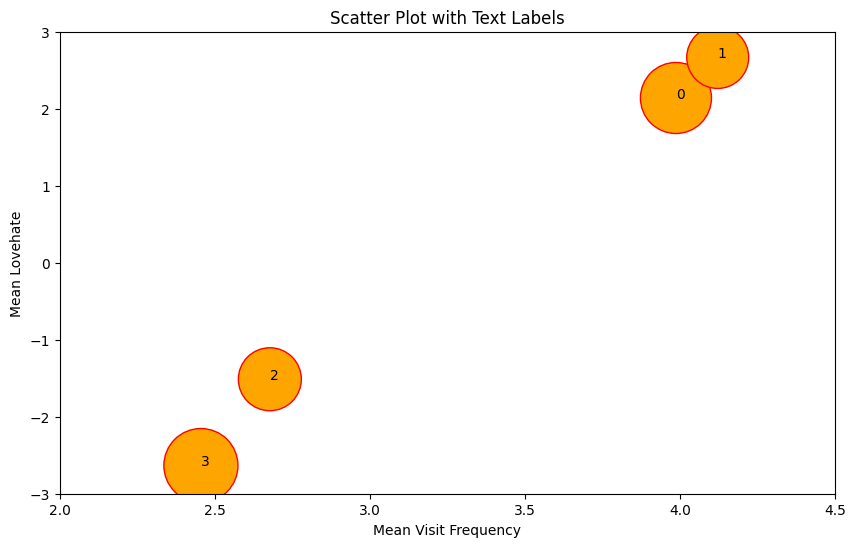

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=5000 * female, edgecolor="red", facecolor="orange")

for i, segment in enumerate(visit.index):
    plt.text(visit[segment], like[segment], str(i))

plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Lovehate')
plt.title('Scatter Plot with Text Labels')

plt.grid(False)
plt.show()